In [9]:
import matplotlib.pyplot as plt
from os import path

from src.ingest_data import ingest_data_dir
from src.query_data import get_flags_captured, get_flag_time_taken

In [10]:
enterprise_baseline = ingest_data_dir(path.join('data', 'enterprise_capabilities_2'))

In [11]:
flags = get_flags_captured(enterprise_baseline)

# Output as csv
flags.to_csv(path.join('output', 'capability_flags.csv'))

In [12]:
enterprise_baseline_one_flag = get_flag_time_taken(enterprise_baseline, 1)
enterprise_baseline_three_flag = get_flag_time_taken(enterprise_baseline, 3)
enterprise_baseline_five_flag = get_flag_time_taken(enterprise_baseline, 5)

print(enterprise_baseline_one_flag)

{'enterprise_honeyservice_3': [6.662952411174774, 6.025063598155976, 5.768588797251383, 6.263022383054097, 7.09161544640859], 'enterprise_decoy_3': [6.226407059033712, 7.703007650375366, 8.394814360141755, 8.9340793689092], 'enterprise_honeyservice_1': [4.542952287197113, 5.6826832811037695, 5.426702348391215, 5.159184344609579, 5.700515047709147], 'enterprise_decoy_2': [7.471121048927307, 6.57961429754893, 7.454069411754608, 6.204645963509877, 6.92140611410141], 'enterprise_decoy_4': [10.43885657787323, 8.535385048389434, 8.085920584201812, 8.340177154541015, 8.21377617518107], 'enterprise_honeyservice_5': [8.33436279296875, 8.315057929356893, 7.896890139579773, 7.656969813505809], 'enterprise_honeyservice_4': [7.089307192961375, 7.176130302747091, 7.530279672145843, 7.057276999950409], 'enterprise_honeyservice_2': [6.054388705889384, 6.191172166665395, 6.3332037647565205, 6.203840613365173, 6.167213598887126], 'enterprise_decoy_1': [5.967528971036275, 6.3440085530281065, 6.1093741416

In [25]:
def plot_runtime_data(data1, title):
    # Remove 'enterprise_' from data keys
    data1 = {key.replace('enterprise_', ''): value for key, value in data1.items()}
    data1 = {key.replace('honey', ''): value for key, value in data1.items()}

    # Sory keys
    data1 = dict(sorted(data1.items()))

    fig, ax = plt.subplots()
    # make figure wider
    fig.set_size_inches(15, 3)
    # Plot data1 as a blue boxplot
    ax.boxplot(data1.values(), widths=0.2)
    
    ax.set_xticklabels(data1.keys())
    ax.set_ylabel('Time (minutes)')
    ax.set_title(title)
    plt.show()

# Plot flags captured as a stacked bar chart
def plot_flags_captured(data):
    # Remove 'enterprise_' from data keys
    data = {key.replace('enterprise_', ''): value for key, value in data.items()}
    data = {key.replace('honey', ''): value for key, value in data.items()}

    # Sory keys
    data = dict(sorted(data.items()))

    fig, ax = plt.subplots()
    # make figure wider
    fig.set_size_inches(12, 2)
    ax.boxplot(data.values())
    ax.set_xticklabels(data.keys())
    ax.set_ylabel('Flags captured')
    ax.set_title('Flags captured of each emulation (N=5)')
    plt.show()

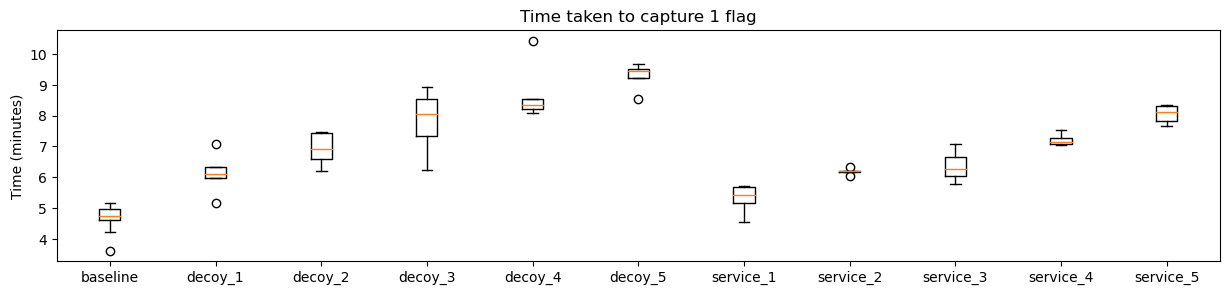

In [26]:
plot_runtime_data(enterprise_baseline_one_flag, 'Time taken to capture 1 flag')

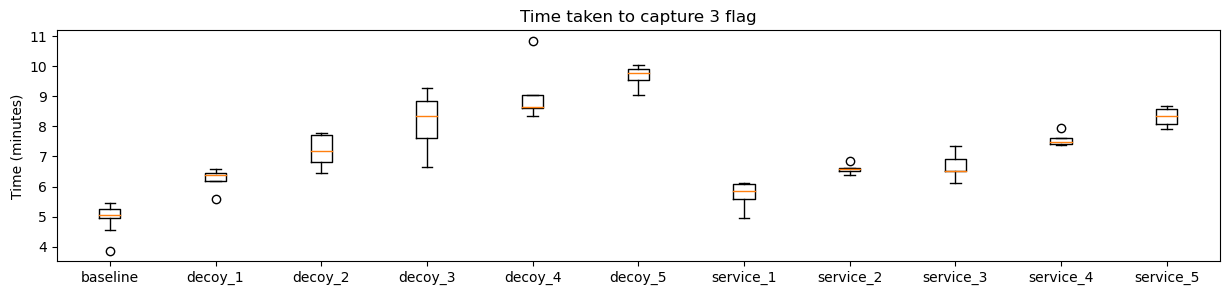

In [27]:
plot_runtime_data(enterprise_baseline_three_flag, 'Time taken to capture 3 flags')

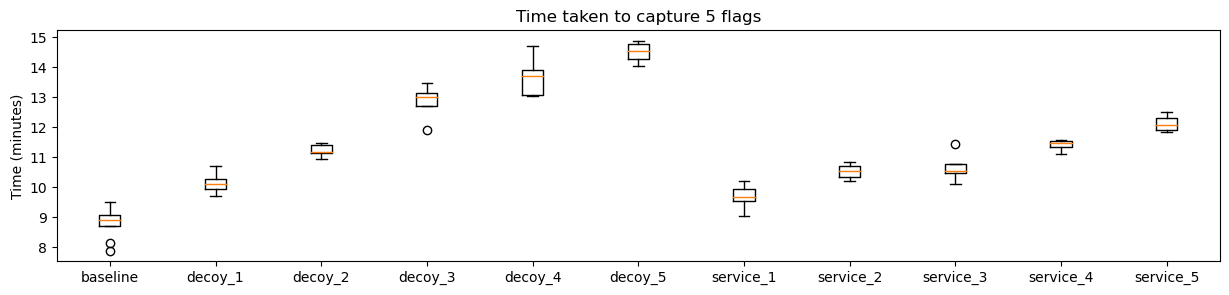

In [28]:
# Plot runtime data in box and whisker plot
plot_runtime_data(enterprise_baseline_five_flag, 'Time taken to capture 5 flags')

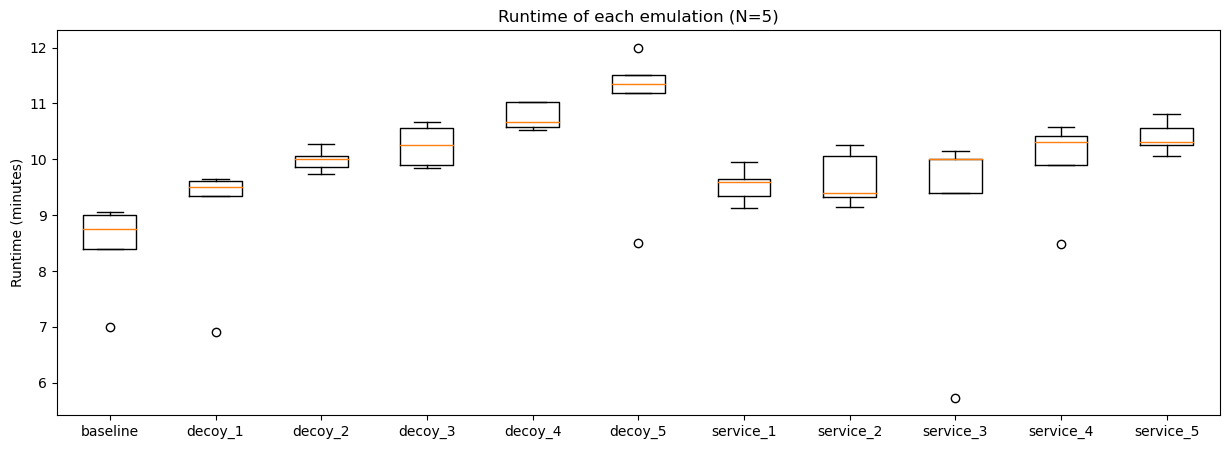

In [9]:
plot_runtime_data(enterprise_capabilities_runtime_data)

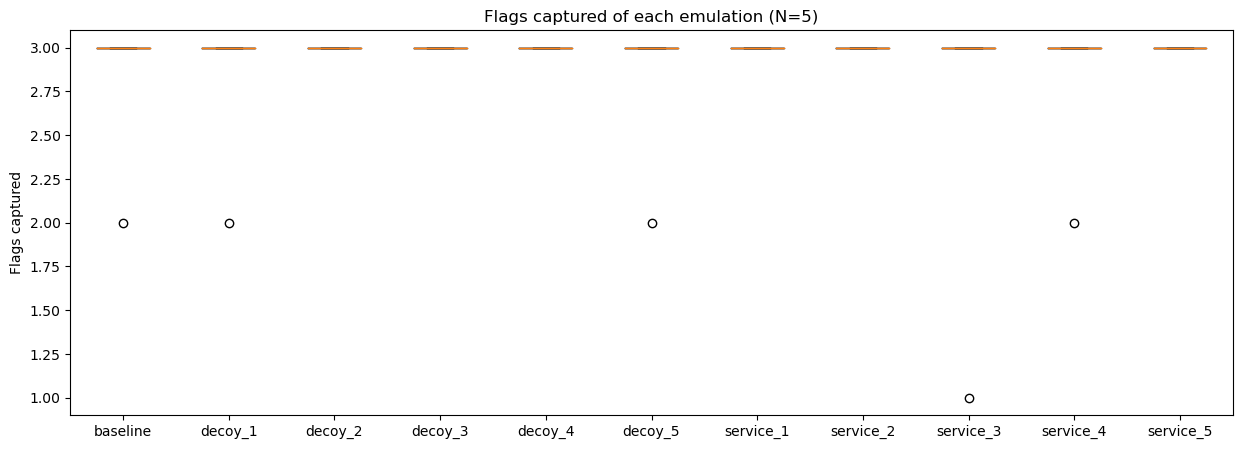

In [10]:
plot_flags_captured(enterprise_simple_flags_captured)

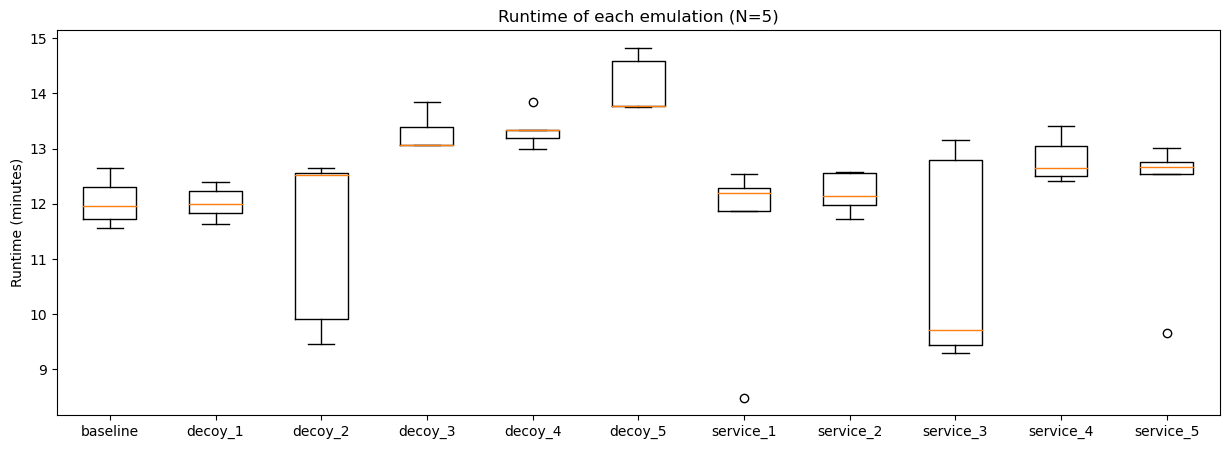

In [8]:
plot_runtime_data(enterprise_bug_runtime_data)